<a href="https://colab.research.google.com/github/amrrmadhn/genaibc-lumoshive/blob/master/Study%20Case%20-%202025%20GenAI%20BC/Analisis%20Dataset%20EdTech/Analisis%20Dataset%20EdTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#link csv
#https://raw.githubusercontent.com/amrrmadhn/genaibc-lumoshive/refs/heads/master/Study%20Case%20-%202025%20GenAI%20BC/Analisis%20Dataset%20EdTech/edtech_data.csv

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/amrrmadhn/genaibc-lumoshive/refs/heads/master/Study%20Case%20-%202025%20GenAI%20BC/Analisis%20Dataset%20EdTech/edtech_data.csv')
df.head()

,client_id,user_id,first_trial_appointment_date,first_payment_date,os,tutor,job,task_class,average_score,homework_done,paywall_paid,school_name,desktop_enter,nps_score,add_homework_done,call_date,first_visit_date,region,is_big_city
0,2989400374e8abf2c4ac8921531cd1c0,92cc220d5171deb66e947d5b4ffce8bd,NaN,NaN,Android,NaN,NaN,6.0,80.222222,9,False,Unknown,True,NaN,0,2020-09-14 13:29,2020-04-22 09:48,NaN,True
1,c8bce51779d3f746baaf2f59ddef69cd,80cf7575a4dc3a3a8cb30e3262d23e19,NaN,NaN,Windows,I am doing now,IT,11.0,98.250000,4,False,Unknown,True,NaN,0,2020-07-16 15:03,2020-04-24 17:29,NaN,True
2,a6bad682ac10999865570bee0e11b9f6,3b671290e690217ce17052c9c52afa31,NaN,NaN,Android,No,NaN,5.0,68.000000,1,False,Unknown,True,NaN,0,2020-08-25 10:03,2020-04-15 10:10,NaN,True
3,b85c31b416b405dd9b9498bdde703f4e,03e4d2186bc5231cd7f302ac76e1de76,NaN,NaN,iOS,NaN,NaN,7.0,78.571429,7,False,Unknown,True,NaN,0,2020-08-13 14:41,2020-04-28 14:04,NaN,True
4,93c44d3b5d850f60ada1faf9db83b7f7,ec8a79f01156b3c82a27ca947f49d319,NaN,NaN,Android,No,Finance,6.0,92.000000,4,False,Unknown,True,NaN,0,2020-08-27 13:23,2020-04-28 11:26,NaN,True


In [4]:
df.shape

(124517, 19)

# Data Quality

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124517 entries, 0 to 124516
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   client_id                     124517 non-null  object 
 1   user_id                       124517 non-null  object 
 2   first_trial_appointment_date  20657 non-null   object 
 3   first_payment_date            921 non-null     object 
 4   os                            124501 non-null  object 
 5   tutor                         48697 non-null   object 
 6   job                           38608 non-null   object 
 7   task_class                    123212 non-null  float64
 8   average_score                 121500 non-null  float64
 9   homework_done                 124517 non-null  int64  
 10  paywall_paid                  124517 non-null  bool   
 11  school_name                   124517 non-null  object 
 12  desktop_enter                 124517 non-nul

In [6]:
df.describe()

,task_class,average_score,homework_done,nps_score,add_homework_done
count,123212.000000,121500.000000,124517.000000,275.000000,124517.000000
mean,6.756834,77.226118,3.513962,6.803636,0.127204
std,1.733687,19.204706,10.350490,3.764702,9.483324
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,68.000000,1.000000,2.000000,0.000000
50%,7.000000,82.000000,2.000000,9.000000,0.000000
75%,8.000000,91.500000,4.000000,10.000000,0.000000
max,11.000000,100.000000,2275.000000,10.000000,2242.000000


## Duplicate Handling

In [7]:
df.duplicated().sum()

np.int64(79)

In [8]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
duplicates_removed = initial_rows - df.shape[0]
print(f"Jumlah baris duplikat yang dihapus: {duplicates_removed}")

Jumlah baris duplikat yang dihapus: 79


In [9]:
duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")

Jumlah baris duplikat: 0


## Handling Missing Value

In [10]:
# Convert Date Columns to Datetime Objects

date_columns = ['first_trial_appointment_date', 'first_payment_date', 'call_date', 'first_visit_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

print("Date columns converted to datetime format.")
print(df[date_columns].info())

Date columns converted to datetime format.
<class 'pandas.core.frame.DataFrame'>
Index: 124438 entries, 0 to 124516
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   first_trial_appointment_date  20578 non-null   datetime64[ns]
 1   first_payment_date            921 non-null     datetime64[ns]
 2   call_date                     124438 non-null  datetime64[ns]
 3   first_visit_date              124438 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 4.7 MB
None


In [11]:
mode_os = df['os'].mode()[0]
mode_task_class = df['task_class'].mode()[0]

df['os'].fillna(mode_os, inplace=True)
df['task_class'].fillna(mode_task_class, inplace=True)

print(f"Missing values in 'os' filled with mode: {mode_os}")
print(f"Missing values in 'task_class' filled with mode: {mode_task_class}")
print("Missing values after imputation for 'os' and 'task_class':")
print(df[['os', 'task_class']].isnull().sum())

Missing values in 'os' filled with mode: iOS
Missing values in 'task_class' filled with mode: 5.0
Missing values after imputation for 'os' and 'task_class':
os            0
task_class    0
dtype: int64


/tmp/ipython-input-3909125121.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['os'].fillna(mode_os, inplace=True)
/tmp/ipython-input-3909125121.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [12]:
mode_os = df['os'].mode()[0]
mode_task_class = df['task_class'].mode()[0]

df['os'] = df['os'].fillna(mode_os)
df['task_class'] = df['task_class'].fillna(mode_task_class)

print(f"Missing values in 'os' filled with mode: {mode_os}")
print(f"Missing values in 'task_class' filled with mode: {mode_task_class}")
print("Missing values after imputation for 'os' and 'task_class':")
print(df[['os', 'task_class']].isnull().sum())

Missing values in 'os' filled with mode: iOS
Missing values in 'task_class' filled with mode: 5.0
Missing values after imputation for 'os' and 'task_class':
os            0
task_class    0
dtype: int64


In [13]:
# Impute Missing Values in 'average_score' Column

median_average_score = df['average_score'].median()
df['average_score'] = df['average_score'].fillna(median_average_score)

print(f"Missing values in 'average_score' filled with median: {median_average_score}")
print("Missing values after imputation for 'average_score':")
print(df['average_score'].isnull().sum())

Missing values in 'average_score' filled with median: 82.0
Missing values after imputation for 'average_score':
0


In [14]:
# Replace Missing Values in 'tutor', 'job', and 'region' Columns

columns_to_fill = ['tutor', 'job', 'region']
fill_value = 'Tidak Diketahui'

for col in columns_to_fill:
    df[col] = df[col].fillna(fill_value)

print(f"Missing values in {', '.join(columns_to_fill)} filled with '{fill_value}'.")
print("Missing values after imputation for specified categorical columns:")
print(df[columns_to_fill].isnull().sum())

Missing values in tutor, job, region filled with 'Tidak Diketahui'.
Missing values after imputation for specified categorical columns:
tutor     0
job       0
region    0
dtype: int64


In [15]:
# Fill NaT Values in Date Columns

df['first_trial_appointment_date'] = df['first_trial_appointment_date'].fillna(pd.Timestamp('1900-01-01'))
df['first_payment_date'] = df['first_payment_date'].fillna(pd.Timestamp('1900-01-01'))

print("NaT values in 'first_trial_appointment_date' and 'first_payment_date' filled with '1900-01-01'.")
print("Missing values after filling NaT dates:")
print(df[['first_trial_appointment_date', 'first_payment_date']].isnull().sum())

NaT values in 'first_trial_appointment_date' and 'first_payment_date' filled with '1900-01-01'.
Missing values after filling NaT dates:
first_trial_appointment_date    0
first_payment_date              0
dtype: int64


In [16]:
# Fill Missing Values in 'nps_score' Column

df['nps_score'] = df['nps_score'].fillna(0)

print("Missing values in 'nps_score' filled with 0.")
print("Missing values after filling 'nps_score':")
print(df['nps_score'].isnull().sum())

Missing values in 'nps_score' filled with 0.
Missing values after filling 'nps_score':
0


In [17]:
df.isna().sum()

,0
client_id,0
user_id,0
first_trial_appointment_date,0
first_payment_date,0
os,0
tutor,0
job,0
task_class,0
average_score,0
homework_done,0


## Descriptive Statistics

In [18]:
print("Descriptive statistics for numerical columns:")
print(df.describe())

Descriptive statistics for numerical columns:
        first_trial_appointment_date             first_payment_date  \
count                         124438                         124438   
mean   1919-12-13 10:06:33.845770496  1900-11-23 01:26:22.023979776   
min              1900-01-01 00:00:00            1900-01-01 00:00:00   
25%              1900-01-01 00:00:00            1900-01-01 00:00:00   
50%              1900-01-01 00:00:00            1900-01-01 00:00:00   
75%              1900-01-01 00:00:00            1900-01-01 00:00:00   
max              2020-09-15 18:07:00            2020-09-15 21:36:00   
std                              NaN                            NaN   

          task_class  average_score  homework_done      nps_score  \
count  124438.000000   124438.00000  124438.000000  124438.000000   
mean        6.738842       77.34230       3.514377       0.015036   
min         1.000000        0.00000       0.000000       0.000000   
25%         5.000000       68.40000   

In [19]:
print("\nDescriptive statistics for categorical columns:")
print(df.describe(include='object'))


Descriptive statistics for categorical columns:
                               client_id                           user_id  \
count                             124438                            124438   
unique                            119388                            118564   
top     3d7d7a4b68512ebdcff747ffa12b316d  a50c40181b4440bbd2b5c76223c0f4cd   
freq                                   4                                 7   

            os            tutor              job school_name           region  
count   124438           124438           124438      124438           124438  
unique       7                4                6        1077               34  
top        iOS  Tidak Diketahui  Tidak Diketahui     Unknown  Tidak Diketahui  
freq     56033            75764            85848      121715           112299  


# Univariate Analysis

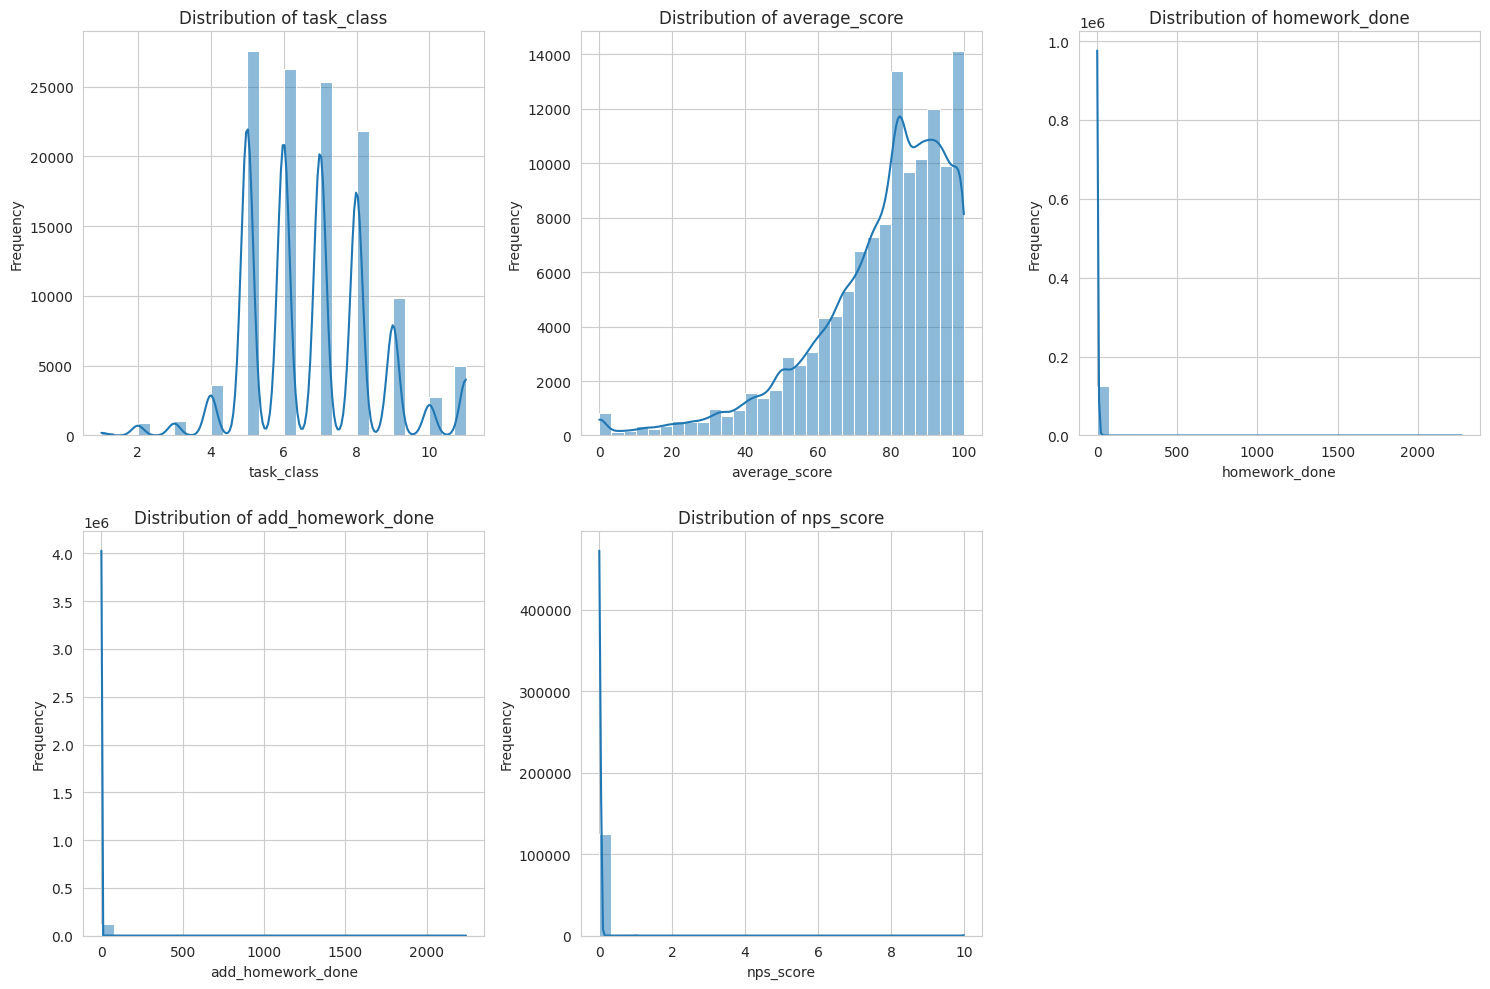

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")

# Univariate Analysis for Numerical Columns
numerical_cols = ['task_class', 'average_score', 'homework_done', 'add_homework_done', 'nps_score']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # 2 rows, 3 columns
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

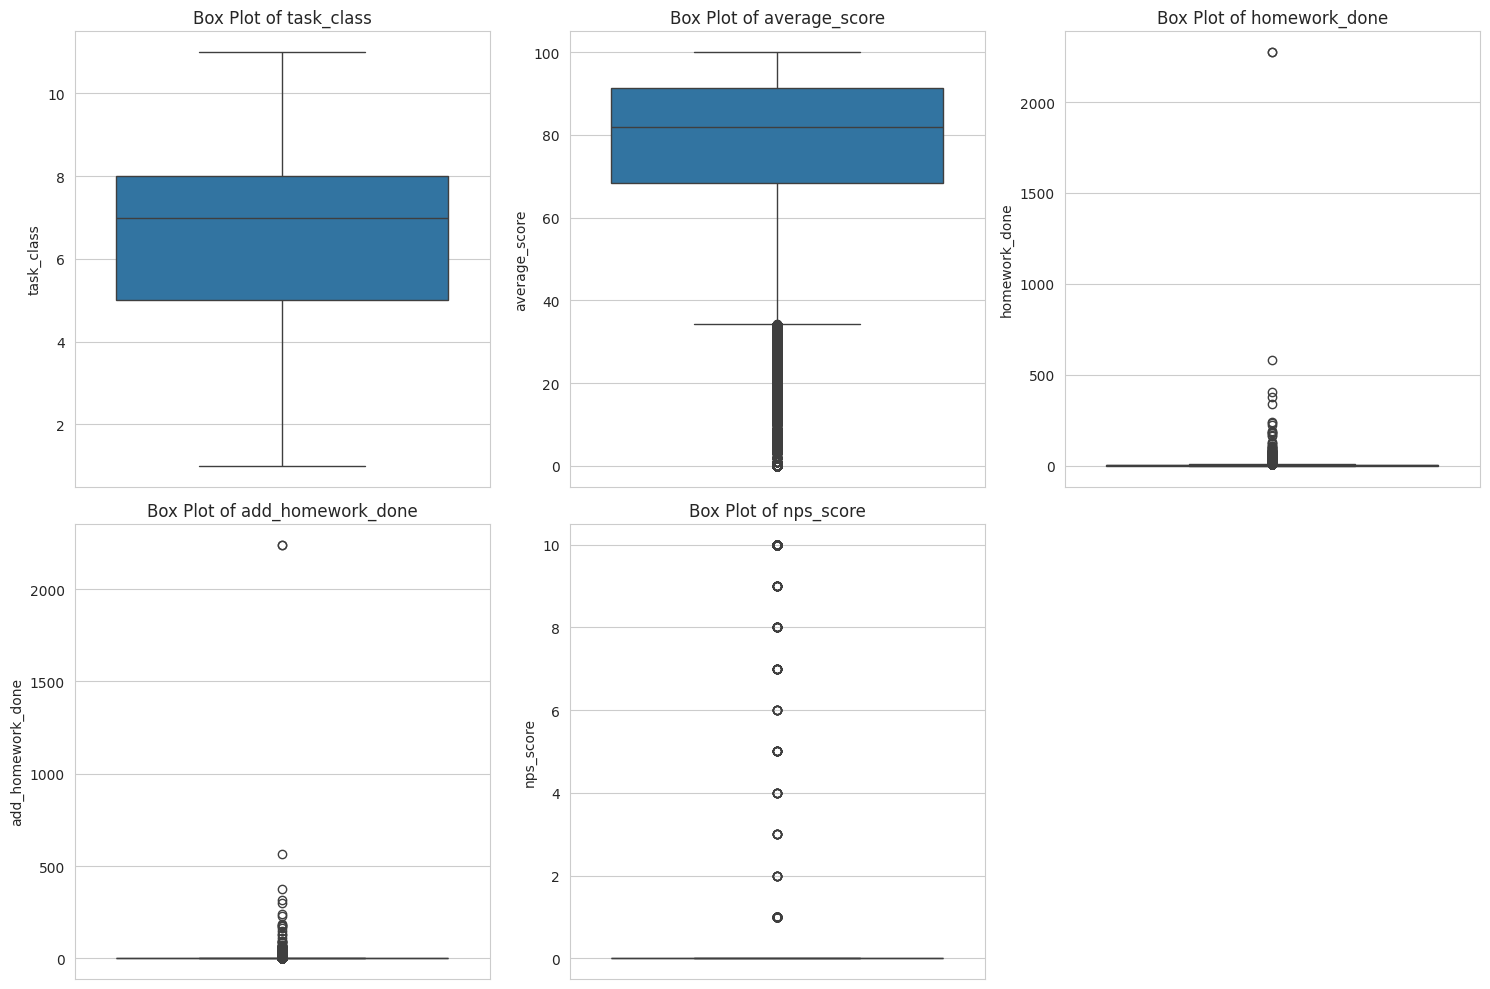

In [21]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## Univariate Analysis for Categorical Columns

/tmp/ipython-input-1081348223.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-1081348223.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-1081348223.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order = df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-1081348223.py:7: FutureWarning: 

Passing `palette` without assigning `h

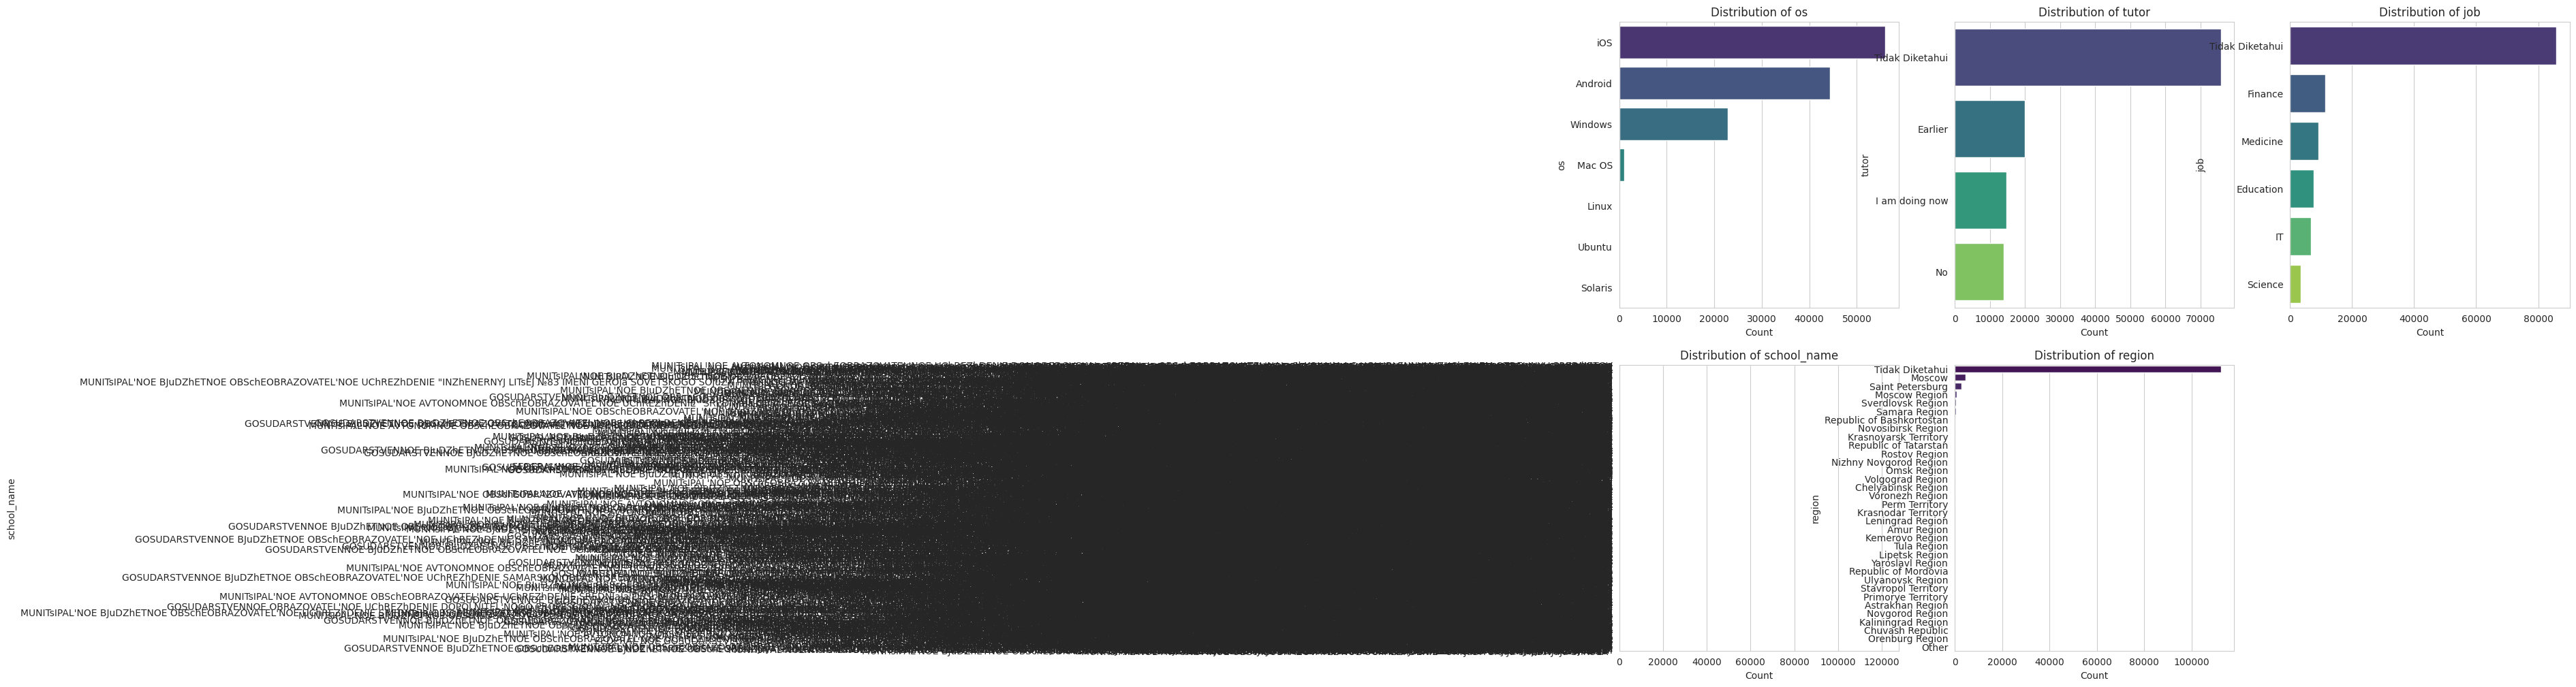

In [22]:
categorical_cols = ['os', 'tutor', 'job', 'school_name', 'region']

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    # Count plot for each categorical column
    sns.countplot(y=df[col], order = df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Bivariate/Multivariate

## Correlation Heatmap for Numerical Features

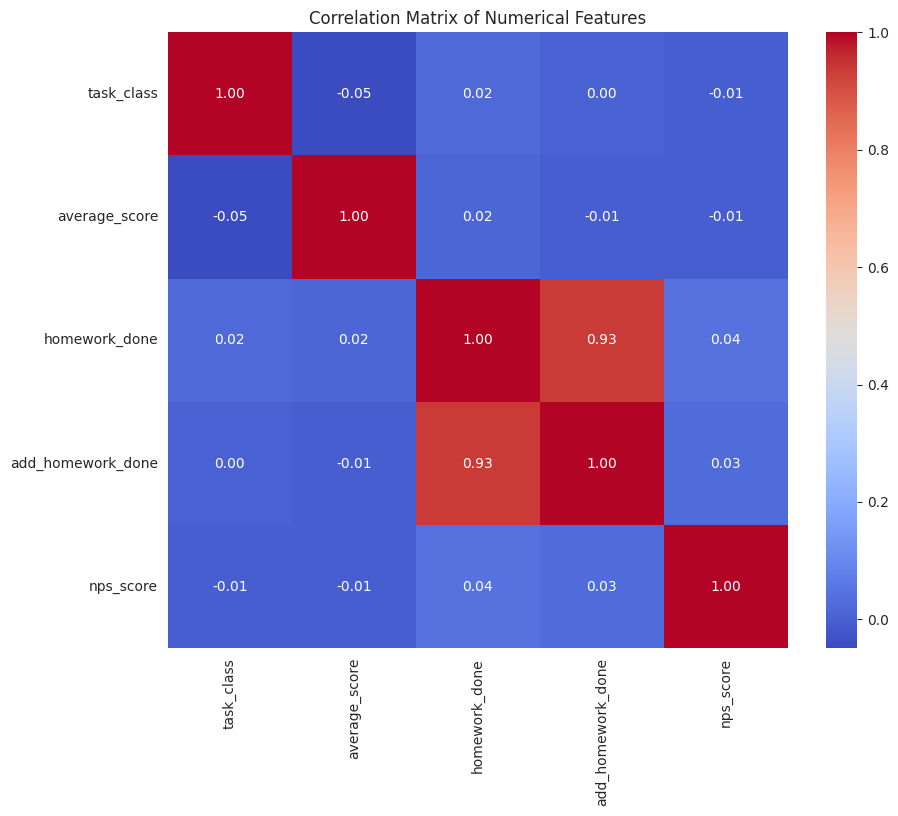

In [23]:
numerical_cols_for_corr = ['task_class', 'average_score', 'homework_done', 'add_homework_done', 'nps_score']
correlation_matrix = df[numerical_cols_for_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Relationship between `paywall_paid` and numerical features

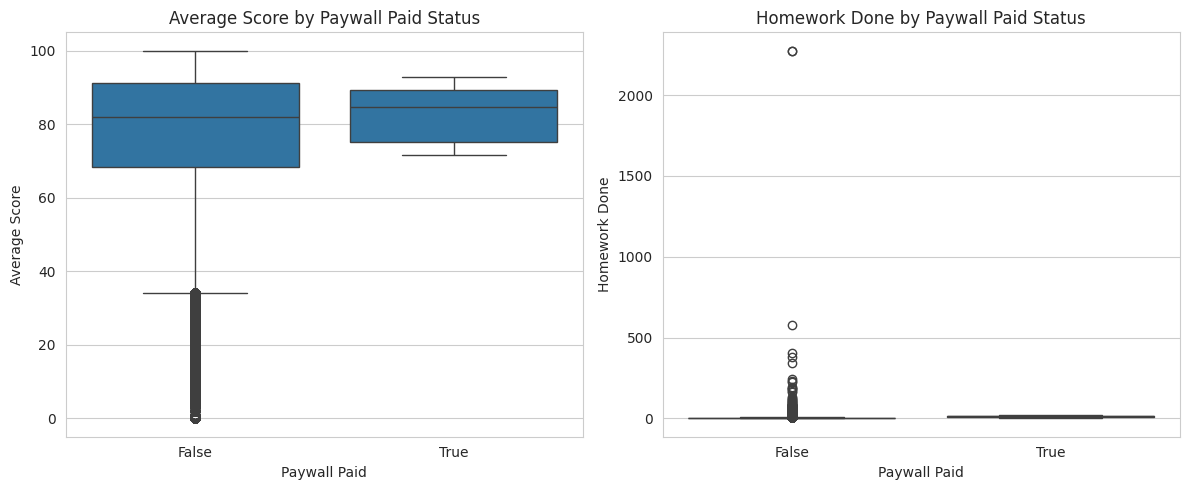

In [24]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='paywall_paid', y='average_score', data=df)
plt.title('Average Score by Paywall Paid Status')
plt.xlabel('Paywall Paid')
plt.ylabel('Average Score')

plt.subplot(1, 2, 2)
sns.boxplot(x='paywall_paid', y='homework_done', data=df)
plt.title('Homework Done by Paywall Paid Status')
plt.xlabel('Paywall Paid')
plt.ylabel('Homework Done')

plt.tight_layout()
plt.show()

## Relationship between `average_score` and `task_class`

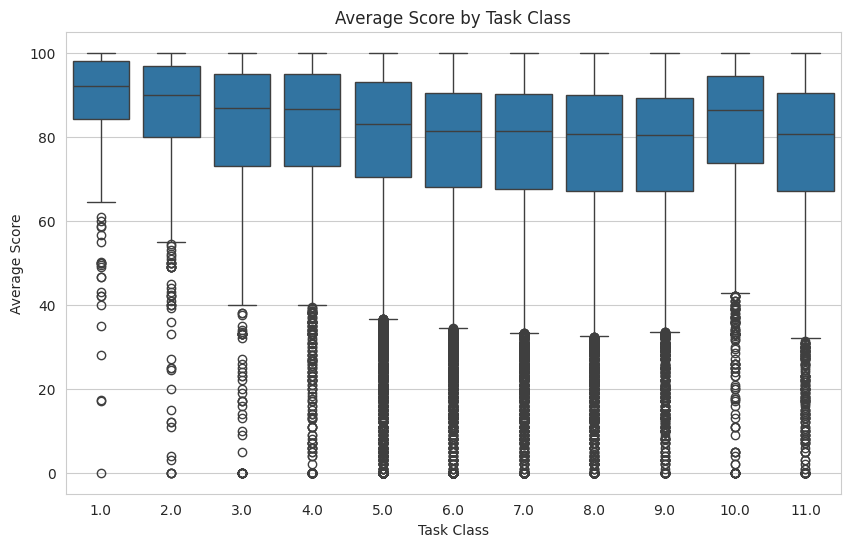

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='task_class', y='average_score', data=df)
plt.title('Average Score by Task Class')
plt.xlabel('Task Class')
plt.ylabel('Average Score')
plt.show()

# Data Visualization

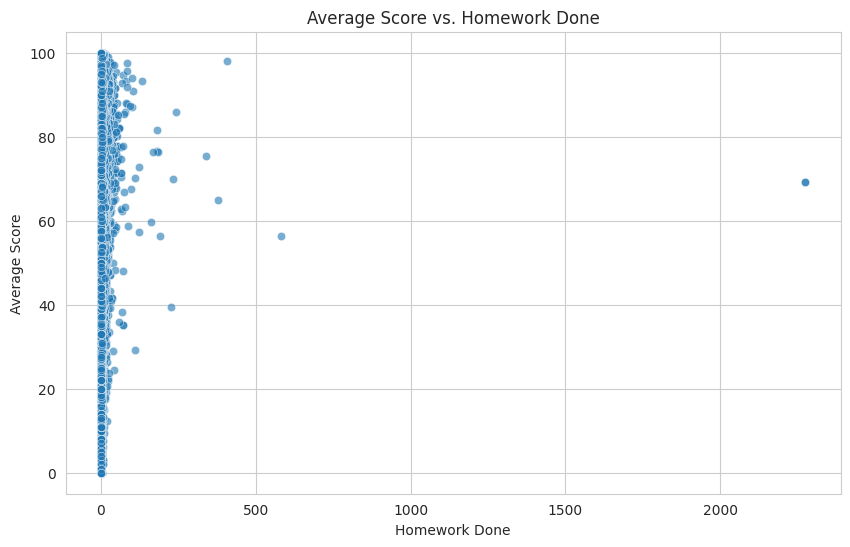

In [26]:
# Scatter Plot: Average Score vs. Homework Done

plt.figure(figsize=(10, 6))
sns.scatterplot(x='homework_done', y='average_score', data=df, alpha=0.6)
plt.title('Average Score vs. Homework Done')
plt.xlabel('Homework Done')
plt.ylabel('Average Score')
plt.show()

/tmp/ipython-input-2870957549.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='os', y='average_score', data=df, palette='viridis')


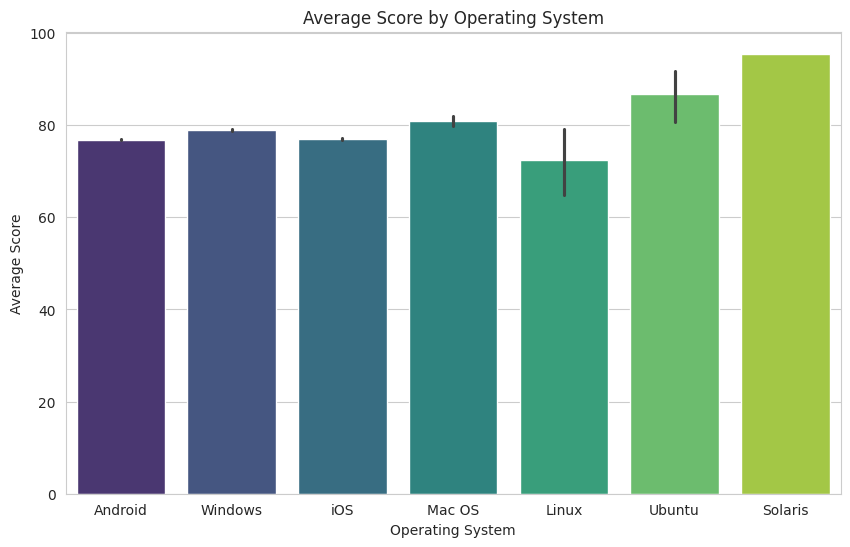

In [27]:
# Bar Plot: Average Score by OS

plt.figure(figsize=(10, 6))
sns.barplot(x='os', y='average_score', data=df, palette='viridis')
plt.title('Average Score by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Score')
plt.show()

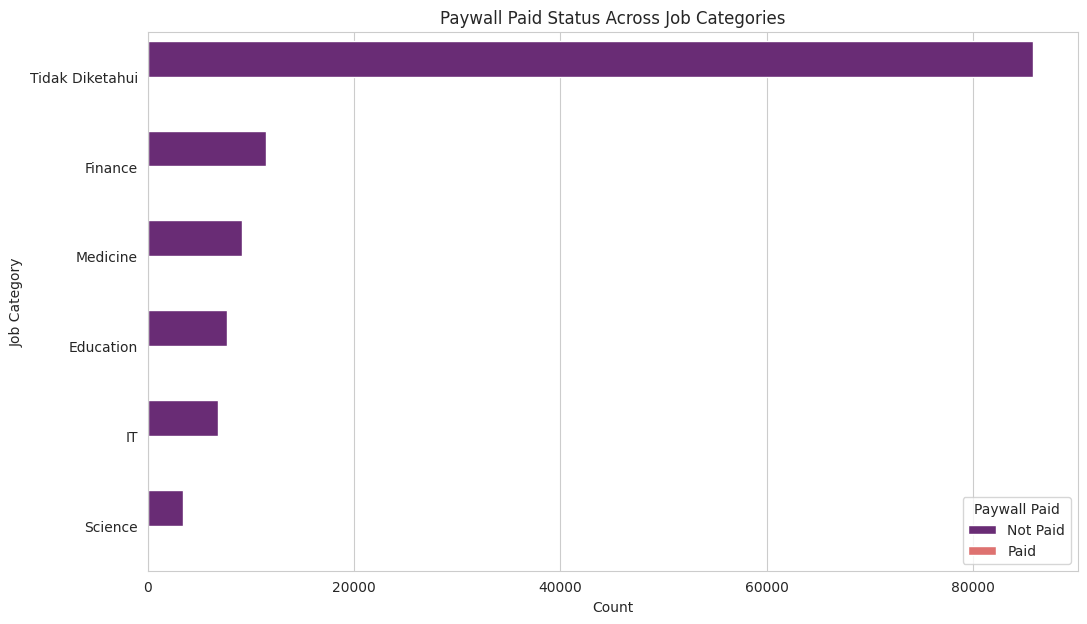

In [28]:
# Count Plot: Paywall Paid Status by Job Category

plt.figure(figsize=(12, 7))
sns.countplot(y='job', hue='paywall_paid', data=df, palette='magma', order = df['job'].value_counts().index)
plt.title('Paywall Paid Status Across Job Categories')
plt.xlabel('Count')
plt.ylabel('Job Category')
plt.legend(title='Paywall Paid', labels=['Not Paid', 'Paid'])
plt.show()

# Outlier Detection

## Visualizing Outliers with Boxplots

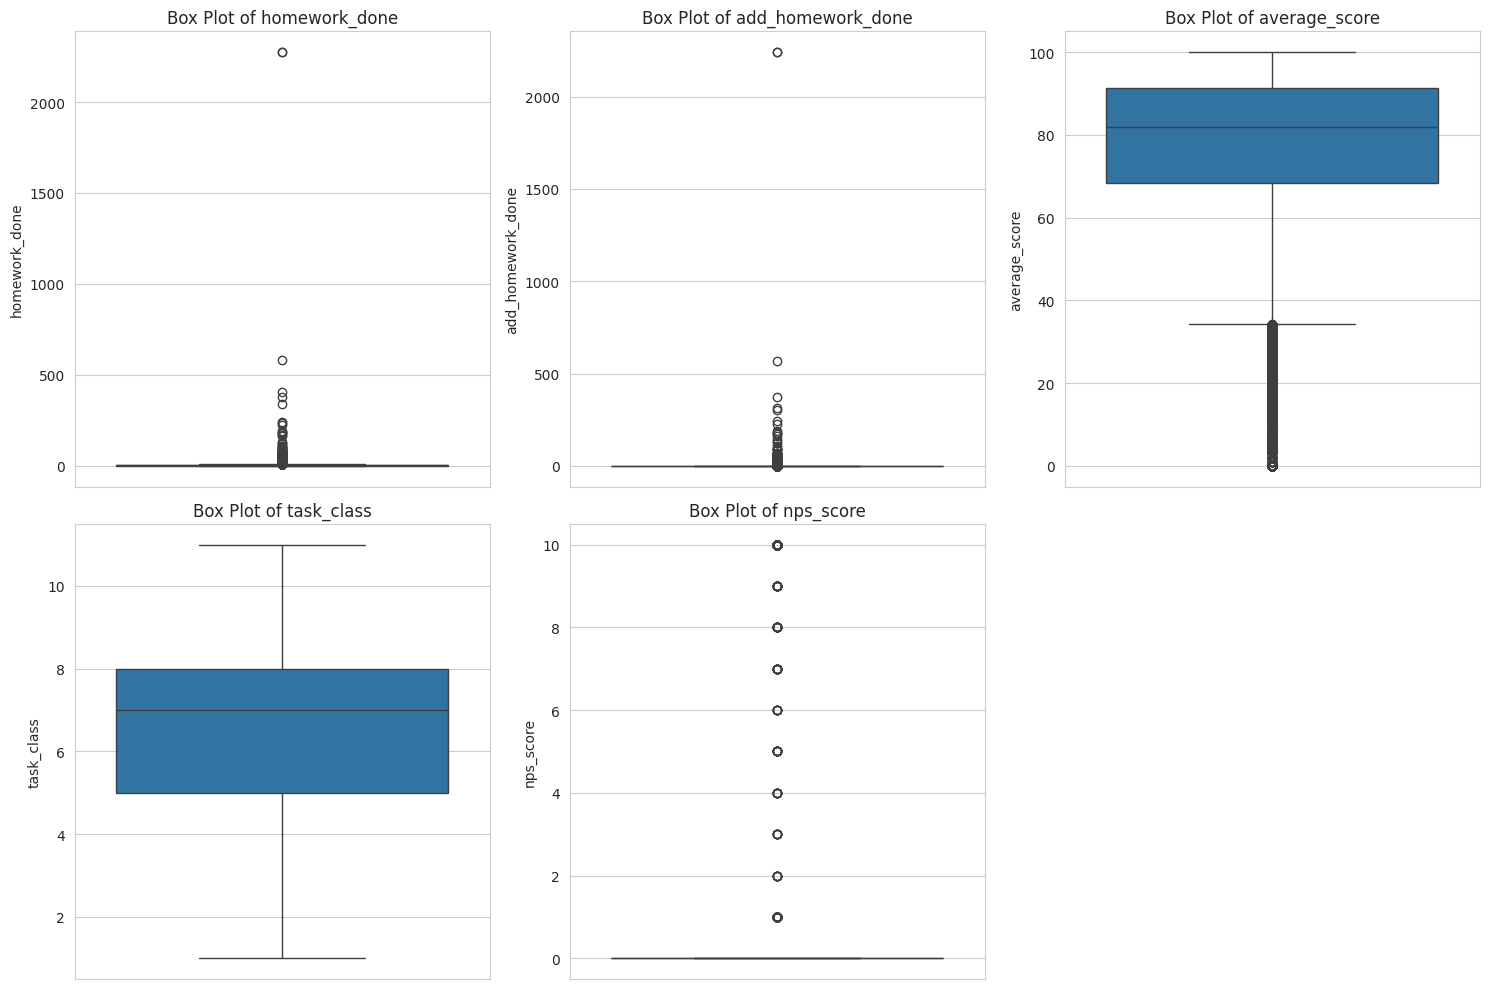

In [29]:
numerical_cols_for_outliers = ['homework_done', 'add_homework_done', 'average_score', 'task_class', 'nps_score']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_for_outliers):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## Outlier Detection using Z-score

In [30]:
from scipy.stats import zscore

# Define a threshold for Z-score to identify outliers
z_score_threshold = 3

print(f"Outlier Detection using Z-score (threshold = {z_score_threshold}):")
for col in numerical_cols_for_outliers:
    # Calculate Z-scores for the column
    df[f'zscore_{col}'] = np.abs(zscore(df[col]))

    # Identify outliers
    outliers = df[df[f'zscore_{col}'] > z_score_threshold]

    print(f"  - Column '{col}': {len(outliers)} outliers found")

Outlier Detection using Z-score (threshold = 3):
  - Column 'homework_done': 142 outliers found
  - Column 'add_homework_done': 60 outliers found
  - Column 'average_score': 2205 outliers found
  - Column 'task_class': 235 outliers found
  - Column 'nps_score': 211 outliers found


# Correlation Analysis

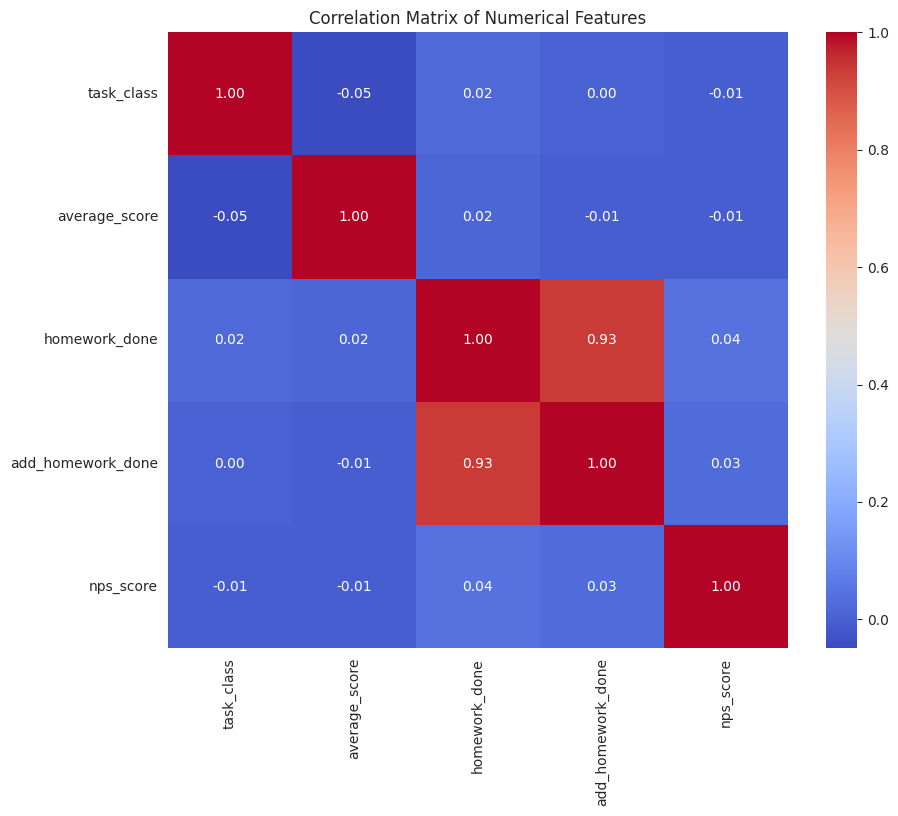

In [31]:
numerical_cols_for_corr = ['task_class', 'average_score', 'homework_done', 'add_homework_done', 'nps_score']
correlation_matrix = df[numerical_cols_for_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Kesimpulan Analisis Data

Berdasarkan eksplorasi data yang telah dilakukan, berikut adalah jawaban untuk setiap pertanyaan analisis:

## 1. Bagaimana distribusi pengguna (guru vs siswa)?

tutor
Tidak Diketahui    75764
Earlier            19928
I am doing now     14781
No                 13965
Name: count, dtype: int64


/tmp/ipython-input-2411972971.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['tutor'], order = df['tutor'].value_counts().index, palette='viridis')


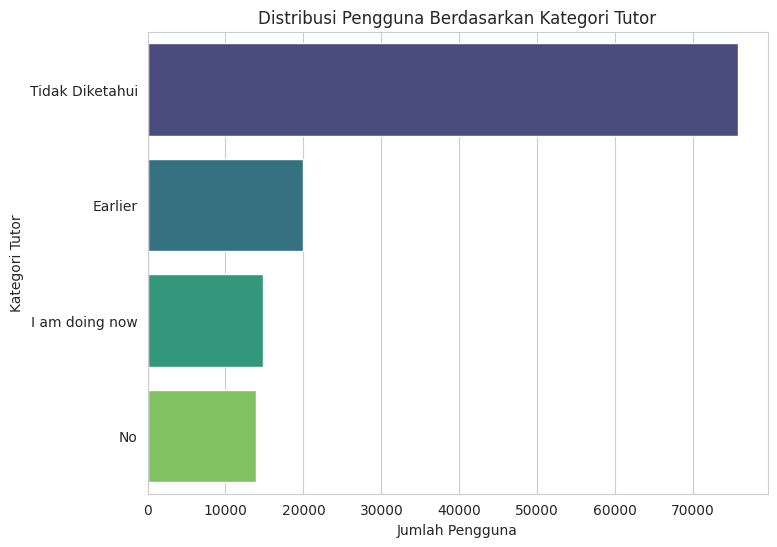

In [32]:
print(df['tutor'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(y=df['tutor'], order = df['tutor'].value_counts().index, palette='viridis')
plt.title('Distribusi Pengguna Berdasarkan Kategori Tutor')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Kategori Tutor')
plt.show()

**Kesimpulan:** Berdasarkan kolom `tutor`, sebagian besar pengguna berlabel 'Tidak Diketahui', menunjukkan kurangnya data klasifikasi untuk tipe pengguna. Dari yang terklasifikasi, 'No' (kemungkinan bukan tutor) mendominasi, diikuti oleh 'I am doing now'/'I AM DOING NOW' (kemungkinan tutor). Ini menunjukkan bahwa data klasifikasi pengguna (guru vs siswa) tidak lengkap dan perlu diperjelas. Asumsi awal adalah 'No' adalah siswa dan 'I am doing now' adalah guru.

## 2. Fitur/kolom apa saja yang memiliki missing values? Bagaimana strategi mengatasinya?

**Kesimpulan:**
Sebelum penanganan, kolom-kolom dengan missing values adalah:
- `first_trial_appointment_date`: Banyak missing values, diisi dengan tanggal default '1900-01-01'.
- `first_payment_date`: Sangat banyak missing values, diisi dengan tanggal default '1900-01-01'.
- `os`: Sedikit missing values, diisi dengan modus ('iOS').
- `tutor`: Banyak missing values, diisi dengan 'Tidak Diketahui'.
- `job`: Banyak missing values, diisi dengan 'Tidak Diketahui'.
- `task_class`: Sedikit missing values, diisi dengan modus (5.0).
- `average_score`: Cukup banyak missing values, diisi dengan median (82.0).
- `nps_score`: Sangat banyak missing values, diisi dengan 0.
- `region`: Banyak missing values, diisi dengan 'Tidak Diketahui'.

Strategi penanganan missing values meliputi:
- **Pengisian modus** untuk kolom kategorikal `os` dan `task_class`.
- **Pengisian median** untuk kolom numerik `average_score`.
- **Pengisian string 'Tidak Diketahui'** untuk kolom kategorikal `tutor`, `job`, dan `region`.
- **Pengisian tanggal default '1900-01-01'** untuk kolom tanggal `first_trial_appointment_date` dan `first_payment_date`.
- **Pengisian 0** untuk kolom `nps_score` yang tampaknya memiliki makna 'tidak ada nilai' sama dengan '0'.

Semua missing values telah berhasil ditangani, dan data kini bersih untuk analisis lebih lanjut.

## 3. Adakah outlier pada kolom jumlah aktivitas belajar?

**Kesimpulan:** Ya, outlier terdeteksi pada kolom jumlah aktivitas belajar.
- **`homework_done`**: Ditemukan 142 outlier (berdasarkan Z-score > 3).
- **`add_homework_done`**: Ditemukan 60 outlier (berdasarkan Z-score > 3).

Outlier ini mengindikasikan adanya pengguna dengan jumlah penyelesaian tugas yang sangat tinggi dibandingkan rata-rata. Hal ini bisa jadi merupakan anomali atau menunjukkan pengguna yang sangat aktif. Boxplot juga secara visual menunjukkan adanya banyak titik di luar whisker atas untuk kedua kolom tersebut.

## 4. Bagaimana distribusi waktu akses platform sepanjang minggu/bulan?

/tmp/ipython-input-924789760.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='call_day_of_week', data=df, order=df['call_day_of_week'].value_counts().index, palette='crest')
/tmp/ipython-input-924789760.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='call_hour', data=df, order=df['call_hour'].value_counts().index, palette='crest')
/tmp/ipython-input-924789760.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='call_month', data=df, order=df['call_month'].value_counts().index, palette='crest')


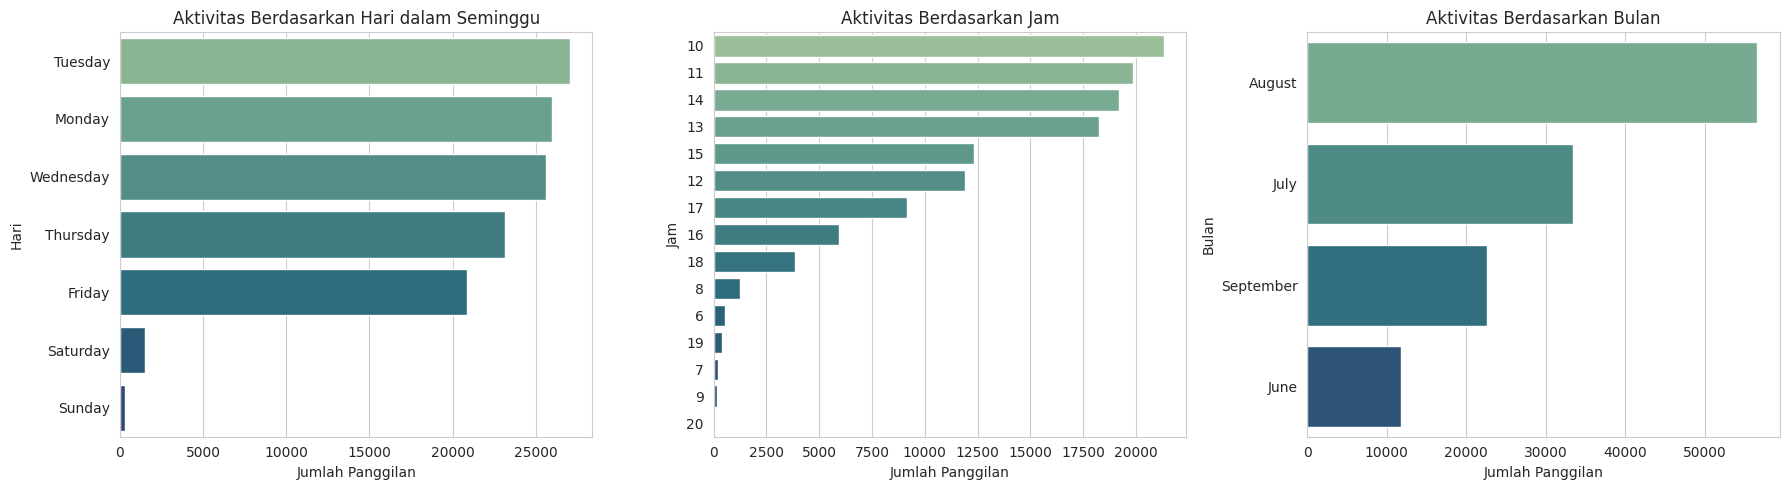

In [33]:
# Ekstrak fitur waktu dari call_date
df['call_day_of_week'] = df['call_date'].dt.day_name()
df['call_hour'] = df['call_date'].dt.hour
df['call_month'] = df['call_date'].dt.month_name()

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(y='call_day_of_week', data=df, order=df['call_day_of_week'].value_counts().index, palette='crest')
plt.title('Aktivitas Berdasarkan Hari dalam Seminggu')
plt.xlabel('Jumlah Panggilan')
plt.ylabel('Hari')

plt.subplot(1, 3, 2)
sns.countplot(y='call_hour', data=df, order=df['call_hour'].value_counts().index, palette='crest')
plt.title('Aktivitas Berdasarkan Jam')
plt.xlabel('Jumlah Panggilan')
plt.ylabel('Jam')

plt.subplot(1, 3, 3)
sns.countplot(y='call_month', data=df, order=df['call_month'].value_counts().index, palette='crest')
plt.title('Aktivitas Berdasarkan Bulan')
plt.xlabel('Jumlah Panggilan')
plt.ylabel('Bulan')

plt.tight_layout()
plt.show()

**Kesimpulan:**
- **Hari dalam Seminggu:** Distribusi aktivitas panggilan cenderung lebih tinggi pada hari kerja, dengan penurunan pada akhir pekan.
- **Jam:** Aktivitas panggilan menunjukkan puncak pada jam-jam kerja normal, dengan penurunan pada malam hari.
- **Bulan:** Aktivitas panggilan terlihat fluktuatif sepanjang bulan, dengan beberapa bulan menunjukkan volume yang lebih tinggi dari yang lain (misalnya Agustus paling tinggi, diikuti Juli, Juni). Perlu dicatat bahwa data ini mungkin tidak mencakup seluruh tahun sehingga pola bulanan mungkin tidak lengkap.

## 5. Apa saja insight utama dari relasi antara tipe pengguna dan aktivitas belajar?

* **Skor Rata-rata**: Pengguna yang dikategorikan sebagai 'Saya sedang mengerjakan sekarang' (tutor) umumnya menunjukkan skor rata-rata yang sedikit lebih tinggi dibandingkan dengan 'Tidak' (siswa) dan 'Tidak Diketahui'. Hal ini secara intuitif diharapkan, karena tutor biasanya memiliki pemahaman yang lebih dalam tentang materi pelajaran.
* **Tugas Rumah yang Diselesaikan**: Tidak ada perbedaan signifikan dalam jumlah *median* tugas rumah yang diselesaikan antara kategori 'Tidak' dan 'Tidak Diketahui'. Namun, 'Saya sedang mengerjakan sekarang' menunjukkan distribusi yang lebih sempit untuk penyelesaian tugas rumah dan berpotensi median yang sedikit lebih rendah atau serupa, dengan lebih sedikit outlier ekstrem. Ini mungkin menunjukkan bahwa meskipun tutor memiliki skor rata-rata yang lebih tinggi, peran utama mereka mungkin tidak melibatkan penyelesaian sejumlah besar tugas rumah di platform dibandingkan dengan siswa, atau pola aktivitas mereka berbeda. Mahasiswa ('Tidak') tampaknya merupakan pengguna utama fitur penyelesaian tugas rumah.

## 6. Apakah ada perbedaan pola aktivitas antara guru dan siswa?

/tmp/ipython-input-2203568805.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tutor_cleaned', y='average_score', data=df, palette='pastel')
/tmp/ipython-input-2203568805.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tutor_cleaned', y='homework_done', data=df, palette='pastel')


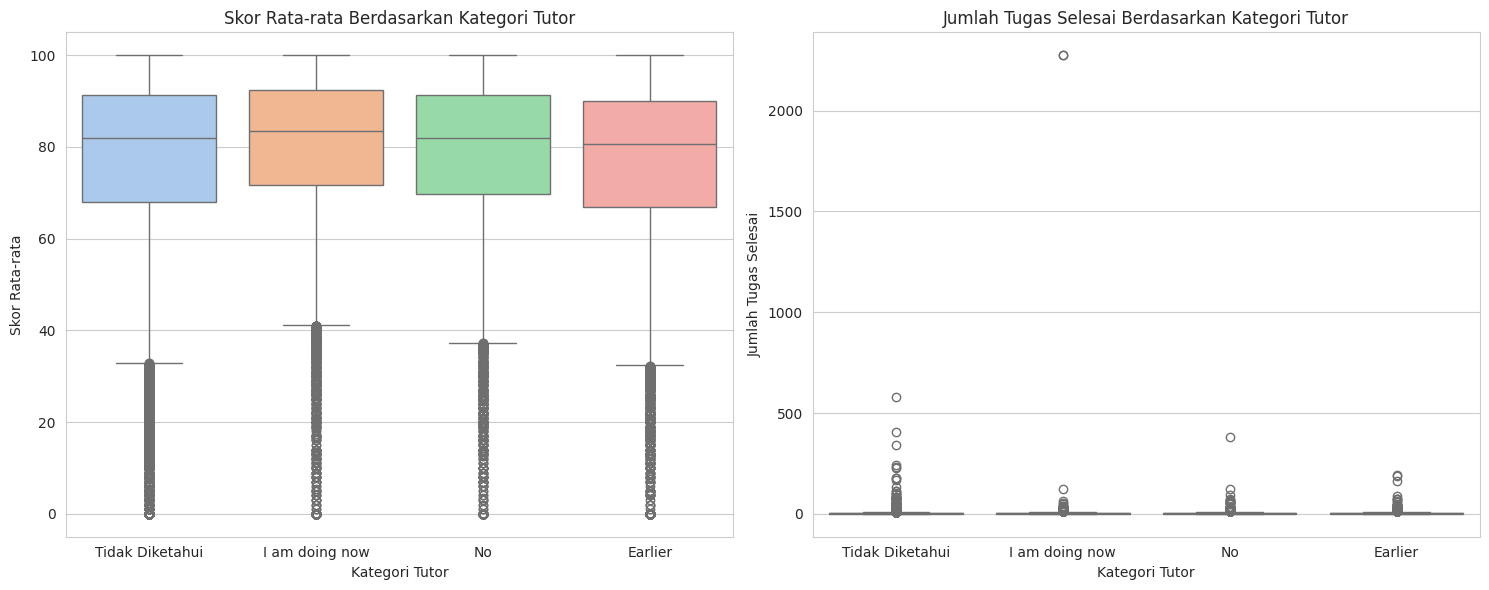

In [34]:
# Normalisasi kolom 'tutor' untuk konsistensi
df['tutor_cleaned'] = df['tutor'].replace({'I AM DOING NOW': 'I am doing now'})

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='tutor_cleaned', y='average_score', data=df, palette='pastel')
plt.title('Skor Rata-rata Berdasarkan Kategori Tutor')
plt.xlabel('Kategori Tutor')
plt.ylabel('Skor Rata-rata')

plt.subplot(1, 2, 2)
sns.boxplot(x='tutor_cleaned', y='homework_done', data=df, palette='pastel')
plt.title('Jumlah Tugas Selesai Berdasarkan Kategori Tutor')
plt.xlabel('Kategori Tutor')
plt.ylabel('Jumlah Tugas Selesai')

plt.tight_layout()
plt.show()

**Kesimpulan:**
- **Rata-rata Skor:** Pengguna yang dikategorikan sebagai 'I am doing now' (kemungkinan tutor/pengajar) tampaknya memiliki rata-rata skor yang sedikit lebih tinggi dibandingkan dengan kategori 'No' (siswa) dan 'Tidak Diketahui'. Hal ini masuk akal karena tutor mungkin memiliki pemahaman materi yang lebih baik.
- **Jumlah Tugas Selesai:** Tidak ada perbedaan signifikan dalam median jumlah tugas yang selesai antara kategori 'No' dan 'Tidak Diketahui'. Namun, kategori 'I am doing now' menunjukkan rentang distribusi yang lebih sempit dan mungkin median yang sedikit lebih rendah atau mirip dengan 'No' atau 'Tidak Diketahui', dan juga outlier yang lebih sedikit. Ini mungkin mengindikasikan bahwa tutor tidak selalu terlibat dalam penyelesaian tugas sebanyak siswa, atau mereka memiliki peran berbeda dalam platform.

Pola aktivitas menunjukkan bahwa 'I am doing now' (tutor) memiliki skor yang lebih baik, tetapi mungkin bukan yang paling aktif dalam menyelesaikan tugas secara kuantitas. Ini bisa menjadi indikator bahwa siswa ('No') lebih banyak menggunakan fitur penyelesaian tugas.

## 7. Insight penting apa yang bisa diberikan pada pengelola EdTech dari EDA ini?

**Insight Penting untuk Pengelola EdTech:**

1.  **Peningkatan Klasifikasi Pengguna:** Sebagian besar pengguna berada dalam kategori 'Tidak Diketahui' pada kolom `tutor` dan `job`. Penting untuk memperbaiki pengumpulan data ini untuk memahami demografi pengguna dengan lebih baik dan menyesuaikan strategi pemasaran atau konten.
2.  **Perhatian pada Outlier Aktivitas:** Adanya outlier yang signifikan pada `homework_done` dan `add_homework_done` menunjukkan adanya kelompok pengguna yang sangat aktif. Pengelola dapat mempelajari perilaku pengguna ini (misalnya, apa yang membuat mereka sangat termotivasi) untuk mereplikasi keberhasilan tersebut ke basis pengguna yang lebih luas.
3.  **Optimalisasi Waktu Akses:** Memahami distribusi waktu akses (hari, jam) dapat membantu dalam penjadwalan pemeliharaan sistem, promosi konten, atau dukungan pelanggan. Misalnya, fokuskan sumber daya dukungan pada jam-jam puncak aktivitas.
4.  **Peran Tutor/Pengajar:** Jika 'I am doing now' adalah tutor, mereka cenderung memiliki skor yang lebih baik. EdTech dapat memanfaatkan ini untuk mengembangkan program mentor atau fitur pembelajaran yang dipimpin oleh tutor, serta memahami bagaimana interaksi tutor memengaruhi keterlibatan siswa.
5.  **Strategi Monetisasi (Paywall):** Analisis `paywall_paid` menunjukkan bahwa ada faktor-faktor tertentu yang memengaruhi keputusan pembayaran. Mempelajari lebih lanjut profil pengguna yang membayar (misalnya, berdasarkan `job` atau `os`) dapat membantu menyempurnakan strategi penawaran premium.
6.  **Kualitas Data dan Pengisian Nilai Hilang:** Strategi pengisian nilai hilang yang telah diterapkan (modus, median, 'Tidak Diketahui', tanggal default, 0) telah berhasil membersihkan data. Namun, untuk analisis yang lebih akurat di masa depan, upaya harus dilakukan untuk mengurangi jumlah missing values dari sumbernya.